In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import statannot
import pymannkendall as mk
from scipy import stats
from scipy.stats import mannwhitneyu, normaltest,wilcoxon

sns.set(font="Arial")
plt.rcParams["font.family"] = "Arial"
sns.set_style("whitegrid")
plt.rcParams["mathtext.fontset"]='custom'
sns.set(font="Arial",font_scale=1.3,style="whitegrid")

In [2]:
sams=pd.read_csv("sams_after_cutoff_04102024.csv")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Primary vs. Advanced
Untreated: Mann-Whitney-Wilcoxon test two-sided, P_val:4.487e-02 U_stat=3.862e+05
Advanced
Untreated vs. Advanced
Treated: Mann-Whitney-Wilcoxon test two-sided, P_val:3.842e-03 U_stat=3.912e+05
Primary vs. Advanced
Treated: Mann-Whitney-Wilcoxon test two-sided, P_val:1.689e-11 U_stat=1.025e+06
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Primary vs. Advanced
Untreated: Mann-Whitney-Wilcoxon test two-sided, P_val:9.407e-01 U_stat=4.030e+05
Advanced
Untreated vs. Advanced
Treated: Mann-Whitney-Wilcoxon test two-sided, P_val:5.624e-10 U_stat=3.505e+05
Primary vs. Advanced
Treated: Mann-Whitney-Wilcoxon test two-sided, P_val:2.793e-18 U_stat=9.628e+05


Text(1.77, -0.25, '(N=1550)')

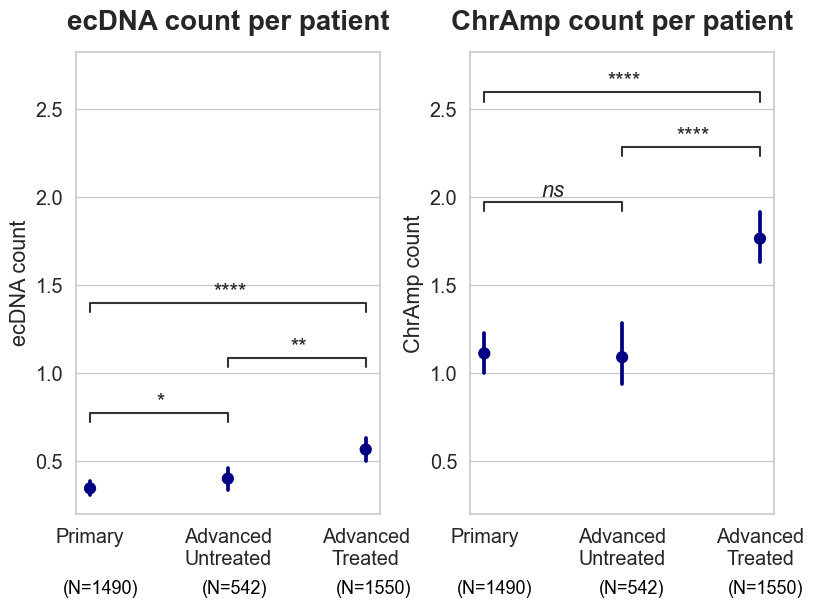

<Figure size 500x670 with 0 Axes>

<Figure size 500x670 with 0 Axes>

In [3]:
fig = plt.figure(figsize=(9, 6))

gs = fig.add_gridspec(1, 2, width_ratios=[1,1])
gs.update(wspace=0.3)

ax2 = plt.subplot(gs[0, 1])
ax2.set(ylim=(0.25, 1.5))
ax1 = plt.subplot(gs[0, 0], sharey=ax2)

# FIRST
plt.figure(figsize=(5,6.7))

plt.rcParams["font.style"] = "italic"
data=sams[(sams['tissue_matched_primary_advanced']=='matched_tissue')]

x='any_pretreatment'
y='ecDNA_count'

pairs=[('Primary','Advanced\nUntreated'),('Primary','Advanced\nTreated'),('Advanced\nTreated','Advanced\nUntreated')]
order=['Primary','Advanced\nUntreated','Advanced\nTreated']

sns.pointplot(ax=ax1, data=data, x=x, y=y,order=order,join=False,palette=['navy','navy','navy'])
ax1.set(ylim=(0.2,2.8))

annot=Annotator(ax1, pairs, data=data, x=x, y=y,order=order)
annot.configure(test='Mann-Whitney', text_format='star', loc='inside')
annot.apply_test()
annot.annotate()
plt.rcParams["font.style"] = "normal"

ax1.set_ylabel('ecDNA count',fontstyle='normal')
ax1.set_xlabel(None)

ax1.set_title("ecDNA count per patient",fontweight='bold',fontstyle='normal',fontsize=20,y=1.03)
ax1.text(-0.2,-0.25,'(N=1490)', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')
ax1.text(0.81,-0.25,'(N=542)', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')
ax1.text(1.78,-0.25,'(N=1550)', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')


# SECOND
plt.figure(figsize=(5,6.7))

plt.rcParams["font.style"] = "italic"
data=sams[(sams['tissue_matched_primary_advanced']=='matched_tissue')]

x='any_pretreatment'
y='Non-ecDNA_count'

pairs=[('Primary','Advanced\nUntreated'),('Primary','Advanced\nTreated'),('Advanced\nTreated','Advanced\nUntreated')]
order=['Primary','Advanced\nUntreated','Advanced\nTreated']

sns.pointplot(ax=ax2,data=data, x=x, y=y,order=order,join=False,palette=['navy','navy','navy'])

annot=Annotator(ax2, pairs, data=data, x=x, y=y,order=order)
annot.configure(test='Mann-Whitney', text_format='star', loc='inside')
annot.apply_test()
annot.annotate()

plt.rcParams["font.style"] = "normal"

ax2.set_ylabel('ChrAmp count',fontstyle='normal')
ax2.set_xlabel(None)

ax2.set_title("ChrAmp count per patient",fontweight='bold',fontstyle='normal',fontsize=20,y=1.03)
ax2.text(-0.2,-0.25,'(N=1490)', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')
ax2.text(0.83,-0.25,'(N=542)', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')
ax2.text(1.77,-0.25,'(N=1550)', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')

#fig.savefig("/images/pngs/Fig2B.png", format="png", bbox_inches="tight",dpi=1200)
#fig.savefig("/images/pdfs/Fig2B.pdf", format="pdf", bbox_inches="tight",dpi=1200)


In [4]:
sams[(sams['tissue_matched_primary_advanced']=='matched_tissue')]['any_pretreatment'].value_counts()

Advanced\nTreated      1550
Primary                1490
Advanced\nUntreated     542
Name: any_pretreatment, dtype: int64